# Keras Integration with TensorFlow Recap

It's important to understand that as of now, Keras has been completely integrated with TensorFlow. The standalone version of Keras is no longer being updated or maintained by the Keras team. So, when we talk about Keras now, we're talking about it as an API integrated within TensorFlow, not a separate stand alone library.

## Classification task

We'll start out with a very simple classification task using a simple numerical data set. 

Let's suppose that an experimental drug was tested on individuals ranging from age 13 to 100 in a clinical trial. The trial had 2100 participants. Half of the participants were under 65 years old, and the other half was 65 years of age or older.

The trial showed that around 95% of patients 65 or older experienced side effects from the drug, and around 95% of patients under 65 experienced no side effects, generally showing that elderly individuals were more likely to experience side effects.

We want to build a model to tell us whether or not a patient will experience side effects solely based on the patient's age. 

In [1]:
# Import libraries

import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Next, we create two empty lists. 
train_labels = []
train_samples = []

In [3]:
np.random.seed(42)

for i in range(50): # 5% of younger and older individuals
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):# 95% of younger and older individuals
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
# Data processing

# We now convert both lists into numpy arrays

train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

train_samples, train_labels = shuffle(train_samples, train_labels)

In [5]:
# We'll scale all of the data to a scale ranging from 0 to 1

scaler = MinMaxScaler(feature_range= (0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [6]:
scaled_train_samples

array([[0.66666667],
       [0.45977011],
       [0.17241379],
       ...,
       [0.96551724],
       [0.93103448],
       [0.67816092]])

### Create an artificial neural network with TensorFlow's Keras API

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

In [8]:
# Build a sequential model

model = Sequential([ # creating sequential model
    Dense(units = 16, input_shape = (1,), activation= 'relu'), # dense layer: fully-connected
    Dense(units = 32, activation= 'relu'), # Second hidden layer
    Dense(units = 2, activation= 'softmax')
])

C:\Users\Julian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

### Train an Artificial Neural Network with TensorFlow's Keras API

In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [11]:
# Setting up the training process with compile
# Adam: Adaptive Moment Estimation. Its optimization is a stochastic gradient descent (SGD) method
# Adam uses learning rate equal to 0.001
# loss function


model.compile(optimizer= Adam(learning_rate=0.0001), 
              loss='sparse_categorical_crossentropy', metrics= ['accuracy'])

In [12]:
# Trainig the model

model.fit(x = scaled_train_samples,
          y = train_labels, 
          batch_size = 10, 
          epochs = 30, 
          verbose = 2)

Epoch 1/30
210/210 - 3s - 13ms/step - accuracy: 0.4548 - loss: 0.7030
Epoch 2/30
210/210 - 1s - 5ms/step - accuracy: 0.5467 - loss: 0.6646
Epoch 3/30
210/210 - 1s - 3ms/step - accuracy: 0.6267 - loss: 0.6345
Epoch 4/30
210/210 - 0s - 2ms/step - accuracy: 0.7181 - loss: 0.5995
Epoch 5/30
210/210 - 1s - 4ms/step - accuracy: 0.7719 - loss: 0.5631
Epoch 6/30
210/210 - 1s - 4ms/step - accuracy: 0.8110 - loss: 0.5254
Epoch 7/30
210/210 - 1s - 5ms/step - accuracy: 0.8386 - loss: 0.4873
Epoch 8/30
210/210 - 1s - 3ms/step - accuracy: 0.8681 - loss: 0.4525
Epoch 9/30
210/210 - 1s - 3ms/step - accuracy: 0.8876 - loss: 0.4206
Epoch 10/30
210/210 - 1s - 3ms/step - accuracy: 0.9019 - loss: 0.3927
Epoch 11/30
210/210 - 1s - 3ms/step - accuracy: 0.9052 - loss: 0.3696
Epoch 12/30
210/210 - 0s - 2ms/step - accuracy: 0.9176 - loss: 0.3504
Epoch 13/30
210/210 - 0s - 2ms/step - accuracy: 0.9205 - loss: 0.3347
Epoch 14/30
210/210 - 1s - 3ms/step - accuracy: 0.9233 - loss: 0.3219
Epoch 15/30
210/210 - 1s - 3

We can see corresponding output for each of the 30 epochs. Judging by the loss and accuracy, we can see that both metrics steadily improve over time with accuracy reaching almost 93% and loss steadily decreasing until we reach 0.27.

### Build a validation set with TensorFlow's Keras API

We hope that we can take our model and apply it to new data, and have the model accurately predict on data that it hasn't seen before, based solely on what it learned from the training set.

Before training begins, we can choose to remove a portion of the training set and place it in a validation set. Then, during training, the model will train only on the training set, and it will validate by evaluating the data in the validation set.

Essentially, the model is learning the features of the data in the training set, taking what it's learned from this data, and then predicting on the validation set. During each epoch, we will see not only the loss and accuracy results for the training set, but also for the validation set.

This allows us to see how well the model is generalizing on data it wasn't trained on because, recall, the validation data should not be part of the training data.

This also helps us see whether or not the model is **overfitting**. Overfitting occurs when the model only learns the specifics of the training data and is unable to generalize well on data that it wasn't trained on.

In [14]:
# Create validation set with Keras

model.fit(
    x = scaled_train_samples,
    y = train_labels,
    validation_split = 0.1, # creates validation set 
    batch_size = 10,
    epochs = 30,
    verbose = 2
)

Epoch 1/30
189/189 - 1s - 4ms/step - accuracy: 0.9402 - loss: 0.2640 - val_accuracy: 0.9619 - val_loss: 0.2024
Epoch 2/30
189/189 - 1s - 3ms/step - accuracy: 0.9349 - loss: 0.2631 - val_accuracy: 0.9619 - val_loss: 0.2012
Epoch 3/30
189/189 - 1s - 3ms/step - accuracy: 0.9370 - loss: 0.2619 - val_accuracy: 0.9619 - val_loss: 0.2003
Epoch 4/30
189/189 - 1s - 3ms/step - accuracy: 0.9344 - loss: 0.2612 - val_accuracy: 0.9619 - val_loss: 0.1993
Epoch 5/30
189/189 - 1s - 3ms/step - accuracy: 0.9370 - loss: 0.2602 - val_accuracy: 0.9619 - val_loss: 0.1982
Epoch 6/30
189/189 - 1s - 3ms/step - accuracy: 0.9370 - loss: 0.2592 - val_accuracy: 0.9619 - val_loss: 0.1972
Epoch 7/30
189/189 - 1s - 3ms/step - accuracy: 0.9370 - loss: 0.2585 - val_accuracy: 0.9619 - val_loss: 0.1964
Epoch 8/30
189/189 - 1s - 3ms/step - accuracy: 0.9370 - loss: 0.2579 - val_accuracy: 0.9619 - val_loss: 0.1953
Epoch 9/30
189/189 - 1s - 3ms/step - accuracy: 0.9376 - loss: 0.2570 - val_accuracy: 0.9619 - val_loss: 0.1946
E

We can now see not only how well our model is learning the features of the training data, but also how well the model is generalizing to new, unseen data from the validation set.

### Evaluating the test set

In [15]:
# Creating the test set

test_labels = []
test_samples = []

for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [16]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [17]:
# Evaluating the test set

predictions = model.predict(
    x = scaled_test_samples,
    batch_size = 10,
    verbose = 0
)

In [21]:
predictions[:5] 

array([[0.01976705, 0.98023295],
       [0.9683005 , 0.03169948],
       [0.05646678, 0.94353324],
       [0.07549582, 0.92450416],
       [0.9700944 , 0.02990563]], dtype=float32)

In [22]:
rounded_predictions = np.argmax(predictions, axis=-1)
rounded_predictions

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,

In [26]:
print(sum(rounded_predictions == test_labels))
print(sum(rounded_predictions != test_labels))

394
26


### Confusion matrix for neural network predictions

In [27]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [31]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)
cm

array([[193,  17],
       [  9, 201]], dtype=int64)

In [42]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [43]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[193  17]
 [  9 201]]


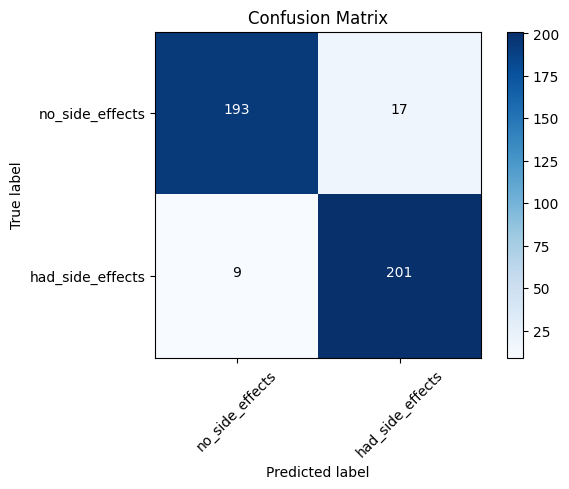

In [44]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Save and load a model with TensorFlow's Keras API

If we want to save a model at its current state after it was trained so that we could make use of it later, we can call the save() function on the model.

In [46]:
model.save('models/medical_trial_model.h5')

In [50]:
# Now that we have this model saved, we can load the model at a later time.

from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [51]:
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644 (2.52 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [58]:
# Saving and loading only the architecture of the model
json_string = model.to_json()
json_string

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 1], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constraint": 

In [61]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [62]:
model_architecture.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,286 (5.03 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)

# https://deeplizard.com/learn/video/LhEMXbjGV_4
<!--  -->